In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [27]:
X = df.drop(columns=['label'], axis=1)
X.head(1)
X.shape

(18285, 4)

In [28]:
y = df['label']
y.head(1)
y.shape

(18285,)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [10]:
df = df.dropna()

In [11]:
messages = df.copy()

messages.reset_index(inplace=True)

In [15]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

In [16]:
stemmer = PorterStemmer()
corpus = []

for i in range(0, len(messages)):

    review = re.sub("^a-zA-Z", " ", messages['title'][i])
    review = review.lower()
    review = review.split()

    review = [stemmer.stem(word) for word in review if word not in stopwords.words('english')]

    review = " ".join(review)

    corpus.append(review)



In [ ]:
corpus

In [31]:
count_vectorizer = CountVectorizer(max_features=5000, ngram_range=(1,3))

X = count_vectorizer.fit_transform(corpus).toarray()

In [32]:
X.shape

(18285, 5000)

In [33]:
y.shape

(18285,)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [38]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [39]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.895
Confusion matrix, without normalization


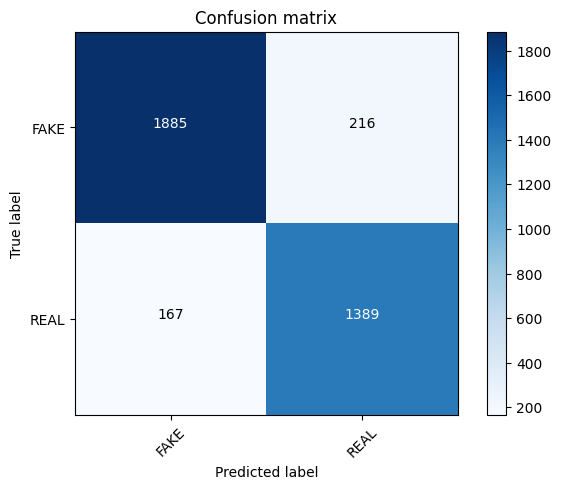

In [40]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [41]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.895269346458846

#### MULTINOMIAL NAIVE BAYES HYPER PARAMETER TUNING

In [42]:
classifier=MultinomialNB(alpha=0.1)


In [43]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/home/harsh/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/naive_bayes.py:624: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/home/harsh/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


Alpha: 0.0, Score : 0.8846048673776319
Alpha: 0.1, Score : 0.8933552091878589
Alpha: 0.2, Score : 0.8941755537325676
Alpha: 0.30000000000000004, Score : 0.8936286573694285
Alpha: 0.4, Score : 0.8933552091878589
Alpha: 0.5, Score : 0.8944490019141372
Alpha: 0.6000000000000001, Score : 0.8944490019141372
Alpha: 0.7000000000000001, Score : 0.8941755537325676
Alpha: 0.8, Score : 0.8941755537325676
Alpha: 0.9, Score : 0.8941755537325676
